In [1]:
import numpy as np
import math
from sympy import *
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def TDT(T):
    b = T[0]+T[2]+2*T[3]; c = T[1]+T[2]+2*T[4]
    if b+c == 0:
        return 0
    else:
        return ((b-c)**2)/(b+c)

In [3]:
def DOLS_TDT(x,n,m):
    TG = np.zeros((m,6))
    for i in range(m):
        for j in range(n):
            TG[i][int(x[j][i])] += 1
    
    #Step 1
    MCP = np.zeros((m,6)); MCN = np.zeros((m,6)) #MaxChange
    for i in range(m):
        T = TG[i]
        X = TDT(T); MCP[i] = np.zeros(6); MCN[i] = np.zeros(6)
        if T[0] >= 1:
            Y = TDT([T[0]-1, T[1]+1, T[2], T[3], T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2]+1, T[3], T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3]+1, T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3], T[4]+1, T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3], T[4], T[5]+1])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
        if T[1] >= 1:
            Y = TDT([T[0]+1, T[1]-1, T[2], T[3], T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2]+1, T[3], T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3]+1, T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3], T[4]+1, T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3], T[4], T[5]+1])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
        if T[2] >= 1:
            Y = TDT([T[0]+1, T[1], T[2]-1, T[3], T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1]+1, T[2]-1, T[3], T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3]+1, T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3], T[4]+1, T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3], T[4], T[5]+1])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
        if T[3] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]-1, T[4]+1, T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]-1, T[4], T[5]+1])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
        if T[4] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]+1, T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3], T[4]-1, T[5]+1])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
        if T[5] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]+1, T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3], T[4]+1, T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
    #print(MCP, MCN)
    
    #Step 2
    LSS = np.zeros(int(2**m))
    for j in range(n):
        LSJ = np.zeros((m,int(2**m)))
        LSJ[0][0] = MCP[0][int(x[j][0])]; LSJ[0][1] = MCN[0][int(x[j][0])]
        #print(LSJ[0],LSJ[1])
        for i in range(1,m):
            for k in range(2**i):
                LSJ[i][2*k+0] = LSJ[i-1][k] + MCP[i][int(x[j][i])]
                LSJ[i][2*k+1] = LSJ[i-1][k] + MCN[i][int(x[j][i])]
        #print(LSJ)
        for i in range(int(2**m)):
            LSS[i] = max(LSS[i],LSJ[m-1][i])    
        #print(LSS)
        
    #Step 3
    DOLSP = np.zeros(m) #LS^{i+}
    DOLSN = np.zeros(m) #LS^{i-}
    
    for j in range(m):
        for i in range(int(2**m)):
            if int(i/(2**(m-1-j)))%2 == 0:
                DOLSP[j] = max(DOLSP[j], LSS[i])
            else:
                DOLSN[j] = max(DOLSN[j], LSS[i])
    
    return DOLSP, DOLSN

In [4]:
def DOSS_TDT_test(n,m): #epsilon = 20*m
    GS = (8*(n-1)/n)*m
    while(1):
        x = np.zeros((n,m))
        for i in range(n):
            x[i] = [random.randrange(6) for j in range(m)]
        DOLSP, DOLSN = DOLS_TDT(x,n,m)
        if math.log(GS/min(DOLSP)) < 2 and math.log(GS/min(DOLSN)) < 2:
            return DOLSP, DOLSN

In [5]:
def h2(z,l):
    return np.sqrt(l)/(math.pi*(z**2+l))

def h3(z,l):
    return (3*np.sqrt(3)*(l**(2/3)))/(4*math.pi*(math.fabs(z)**3+l))

def h4(z,l):
    return (np.sqrt(2)*(l**(3/4)))/(math.pi*(z**4+l))

def h6(z,l):
    return (3*(l**(5/6)))/(2*math.pi*(z**6+l))

def cdf(x,h,l):
    g = lambda z: h(z,l)
    return integrate.quad(g,-oo,x)

def noise(h,l,d): # using inverse transform sampling
    r = np.random.rand()
    q = 1000; z = 10
    for i in range(-50,50):
        if math.fabs(r - cdf(i/5,h,l)[0]) > q:
            z = (i-1)/5
            break
        else:
            q = min(q, math.fabs(r - cdf(i/5,h,l)[0]))
    if d == 0:
        return math.fabs(z)
    elif d == 1:
        return -math.fabs(z)
    
def alpha(k,l,m): #epsilon = 20*m
    return ((l**(1/k))*(20*m))/(2*((k-1)**((k-1)/k)))

In [6]:
def accuracy(n,m,DOLSP,DOLSN): # epsilon = 20*m
    acc = np.zeros((6,4))
    l = [0.5,1,2,3,4,5]
    SS = np.zeros(m); d = np.zeros(m)
    
    for j in range(20):
        for i in range(6):
            for t in range(m):
                if random.random()<0.5:
                    d[t] = 0; SS[t] = DOLSP[j][t]
                else:
                    d[t] = 1; SS[t] = DOLSN[j][t]
                acc[i][0] += math.fabs((SS[t]/alpha(2,l[i],m))*noise(h2,l[i],d[t]))
                acc[i][1] += math.fabs((SS[t]/alpha(3,l[i],m))*noise(h3,l[i],d[t]))
                acc[i][2] += math.fabs((SS[t]/alpha(4,l[i],m))*noise(h4,l[i],d[t]))
                acc[i][3] += math.fabs((SS[t]/alpha(6,l[i],m))*noise(h6,l[i],d[t]))
    return acc/(m*20)

[[0.37852537 0.15415747 0.17697052 0.2459345 ]
 [0.25893829 0.21843269 0.26038632 0.25023094]
 [0.28812074 0.19035768 0.18055198 0.25551761]
 [0.16501051 0.15296545 0.14878391 0.27276465]
 [0.16979613 0.1185364  0.22658618 0.24218409]
 [0.20181755 0.1659095  0.17766883 0.23858283]]
[[0.28216874 0.17393838 0.1784379  0.24228956]
 [0.31104474 0.20747597 0.20766558 0.34597837]
 [0.29921281 0.16761572 0.23452872 0.33002948]
 [0.17417273 0.15132038 0.19957636 0.31821085]
 [0.1852201  0.15926148 0.15371492 0.30819012]
 [0.15747396 0.2156381  0.23094509 0.39108638]]
[[0.32416283 0.2400373  0.21373014 0.3493939 ]
 [0.28757931 0.13550429 0.22588294 0.24864084]
 [0.26751791 0.1386923  0.20139307 0.27227002]
 [0.21512994 0.16294059 0.16762778 0.25863099]
 [0.20510563 0.15622513 0.20523217 0.25749946]
 [0.19492908 0.15109485 0.18499765 0.31640937]]
[[0.25465443 0.20981179 0.1886672  0.30149952]
 [0.30289442 0.17107931 0.14979193 0.29945482]
 [0.23621914 0.19647985 0.22111292 0.2668305 ]
 [0.197216

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


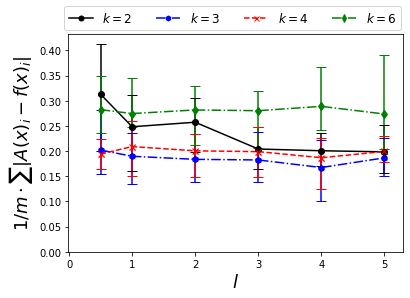

In [7]:
n = 150; m = 2

acc = np.zeros((6,4))
max_acc = np.zeros((6,4)); min_acc = np.ones((6,4))
sum_acc = np.zeros((6,4))

DOLSP = np.zeros((20,m)); DOLSN = np.zeros((20,m))
for i in range(20):
    DOLSP[i], DOLSN[i] = DOSS_TDT_test(n,m)

jj = 10
for j in range(jj):
    acc = accuracy(n,m,DOLSP,DOLSN)
    for i in range(6):
        for k in range(4):
            max_acc[i][k] = max(max_acc[i][k], acc[i][k])
            min_acc[i][k] = min(min_acc[i][k], acc[i][k])
            sum_acc[i][k] += acc[i][k]
    print(acc)
acc = sum_acc/jj

y_err = np.zeros((2,6,4))
for k in range(4):
    y_err[0,:,k] = acc[:,k] - min_acc[:,k]
    y_err[1,:,k] = max_acc[:,k] - acc[:,k]

l = [0.5,1,2,3,4,5]

print(acc)
fig = plt.figure()
plt.ylim(0, max(max_acc[i][j] for i in range(6) for j in range(4))+0.02)
plt.xlim(-0.01, 5.3)
plt.errorbar(l, acc[:,0], yerr = y_err[:,:,0], capsize=5, fmt='o', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(l, acc[:,0], marker="o", markersize=5, color = "black", linestyle = "-", label = "$k = 2$")
plt.errorbar(l, acc[:,1], yerr = y_err[:,:,1], capsize=5, fmt='h', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(l, acc[:,1], marker="h", markersize=5, color = "blue", linestyle = "dashdot", label = "$k = 3$")
plt.errorbar(l, acc[:,2], yerr = y_err[:,:,2], capsize=5, fmt='x', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(l, acc[:,2], marker="x", markersize=5, color = "red", linestyle = "--", label = "$k = 4$")
plt.errorbar(l, acc[:,3], yerr = y_err[:,:,3], capsize=5, fmt='d', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(l, acc[:,3], marker="d", markersize=5, color = "green", linestyle = "dashdot", label = "$k = 6$")
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=4, fontsize=12)
plt.xlabel("$l$", fontsize = 18)
plt.ylabel("$1/m \cdot \sum |A(x)_i - f(x)_i|$", fontsize = 18)
fig.savefig("Accuracy_TDT_kl_m=2.png")
fig.savefig("figs/Accuracy_TDT_kl_m=2.eps", bbox_inches="tight", pad_inches=0.05)